In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [17]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [77]:
len(X_train)

7500

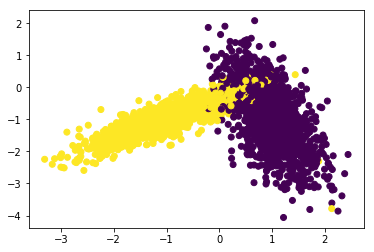

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [19]:
#Generating 10 unique values using the given param_range
param_range=(1,50)
folds = 3

In [20]:
import random

In [63]:
def random_pick_in_1to50(param_range):
    
    new_values=random.sample(range(param_range[0],param_range[1]),10) # Sampling & picking 10 random numbers in range of 1 to 50
    new_values.sort() 
    return new_values
    
#Followed the same way we sample data in Grid search in function
#'randomly_select_60_percent_indices_in_range_from_1_to_len'


In [64]:
random_pick_in_1to50(param_range) # This will pick 10 random numbers in range o 1-50 everytime we run it 

[5, 9, 18, 24, 29, 39, 44, 45, 48, 49]

In [65]:
from sklearn.metrics import accuracy_score

In [70]:
def RandomCV(x_train,y_train,classifier, param_range, folds):
    trainscores=[]
    testscores=[]
    random_values=random_pick_in_1to50(param_range)
    random_val={'n_neighbors':random_values}
    
    print(random_values)
    for i in tqdm(random_val['n_neighbors']):
        trainscores_folds=[]
        testscores_folds=[]
        for j in range(0,folds):
            
            dividing_value=(len(x_train)/folds)
            dval=int(dividing_value)
            # this will initialize the trigger value 2500
            
            test_indices=list(set(list(range((dval*j), (dval*(j+1)))))) 
            
            # The first iteration the test indices will be from 0 to 2499 , 2nd iteration 2500-4999 
            #3rd iteration 5000-7499
            
            train_indices=list(set(list(range(0, len(x_train)))) - set(test_indices))
                                 
                # In the first Iteration the train_indices will be 2500-7499 , 2nd: 0-2499 and 5000-7499 3rd: 0-4999
                
            X_train = x_train[train_indices] # Will pick up 2500-7499 indices values as training in first iteration and so on
            
            Y_train = y_train[train_indices]
            
            X_test  = x_train[test_indices] # will pick first 2500 values as test in 1st iteration and so on
           
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = i  # Each iteration the number of neighbors will be changed
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) # The rest of the process is exactly same like Grid Search
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,random_val

  0%|          | 0/10 [00:00<?, ?it/s]

[1, 12, 13, 14, 18, 25, 37, 41, 44, 45]


100%|██████████| 10/10 [00:08<00:00,  1.08it/s]


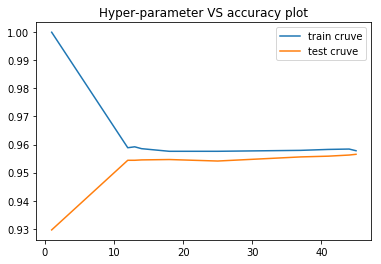

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
trainscores,testscores,params = RandomCV(X_train, y_train, neigh, param_range, folds)

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [ ]:
#Observation :it is observed that The gap between the Train n CV curve is smallest at 41,44,45

In [39]:

print(trainscores)
print('-'*50)
print(testscores)

[0.9624666666666667, 0.9611333333333333, 0.9596666666666667, 0.9571999999999999, 0.9568, 0.9575333333333332, 0.9574666666666666, 0.9582, 0.9584, 0.9578000000000001]
--------------------------------------------------
[0.9495999999999999, 0.9510666666666667, 0.9540000000000001, 0.9533333333333333, 0.9535999999999999, 0.9546666666666667, 0.9553333333333334, 0.956, 0.9562666666666667, 0.9565333333333333]


In [ ]:
#Have taken the plot decision Boundary from Reference

In [43]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

In [44]:
# is getting the highest accuracy 

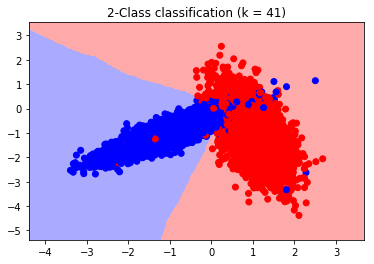

In [72]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 41)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

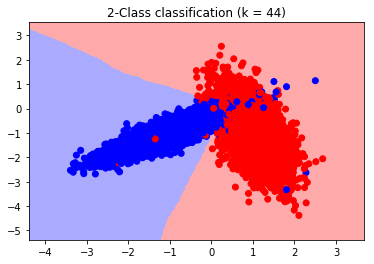

In [73]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 44)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

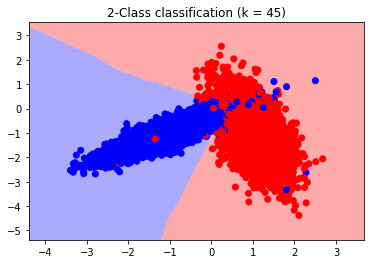

In [74]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

Observation: The key only Difference in implementation of GridSearchCV and RandomSearchCV is Trying wide spread of values than selecting maually 



